# Caesar and Vigenere Ciphers

## The Caesar Cipher

The Caesar Cipher is a simple cipher, one of the earliest ones actually, and it's a form of a substitution cipher. The simple idea is that we replace each letter in a text by a letter of a given distance away from itself in.

In this exercise we will look at how encrypting a message with the Caesar Cipher changes the frequencies of letters in that text. The cell below contains some funcitons that will help us along the way such as a function that we can use to plot the frequencies of letters in a given text. We also define what our alphabet is here. If you are interested in what the functions are and what they do, there are some comments to help you understand. If not, you may simply run the cell and move down to the next one.

In [6]:
from ipywidgets import interact, fixed
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 6]

alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

# normalize_text(txt) is returns txt with all its letters
# set to uppercase characters
def normalize_text(txt):
    txt = txt.upper()
    return txt

# get_normalized_length(txt) returns the lendgth of
# txt disregarding anything that is not a letter e.g. commas, fullstops etc
def get_normalized_length(txt):
    length = 0
    for x in txt:
        # if x exists in our alphabet, add 1 to the length
        if alphabet.count(x) >= 1:
            length += 1
    return length

# create_freq_dictionary(txt) returns a dictionary of 
# letters in our alphabet with the frequency (%) of its
# occurence in txt
# e.g. create_freq_dictionary("Hello World") -> H: 10; D: 10; E: 10; L: 30; O: 20; R: 10; W: 10
def create_freq_dictionary(txt):
    dictionary = {}
    length = get_normalized_length(txt)
    for x in list(alphabet):
        dictionary[x] = (txt.count(x)/length)*100
    return dictionary

# get_frequency_plot(txt) uses create_freq_dictionary(txt) and
# displays a bar chart of the frequency of each letter in the alphabet
# in txt as a percentage
def get_frequency_plot(txt):
    if len(txt) > 0:
        test_dict = sorted(create_freq_dictionary(txt).items())
        keys = [item[0] for item in test_dict]
        values = [item[1] for item in test_dict]
        plt.cla()
        plt.title("Frequency Plot of Enlgish Letters")
        plt.bar(range(len(keys)), values, width=0.8, color='c', label="Your Text")
        plt.xticks([i+0.4 for i in range(len(keys))], keys)
        plt.ylabel("Letter Frequency %")
        plt.plot()
    

The Caesar Cipher takes a text and an integer value that we call the shift. Each letter in the text is then shifted to the right in correspondance to this value. For example, if we were to have a shift of 3, A will become D, B will become E and so on. We loop to the beginning when we reach the end of our alphabet so a shift of 3 would mena X becomes A.

![](img/caesar.png)

Below is a function that does just that and returns you the encrypted text. To make things easier, we first "normalize" the text so that all the letters are now uppercase characters. We do that so that we don't have to worry about finding a match in our alphabet which you can see is all upper case. In reality, though 'a' and 'A' are the same letter to us, this is not the case in terms of code, they both have different values and represent different characters. To avoid this confusion, we make everything upper case. Then, we loop through the text and change each character depending on the shift value. We skip this step for everything that is not a part of our alphabet e.g. punctuations.

In [9]:
def encrypt_caesar(text, shift):
    result = ""
    #normalize_text(text) returns text with all upper case letters
    text = normalize_text(text)
    
    #loop from i = 0 to i < length of text 
    for i in range(len(text)): 
        #char = character at index i in text
        char = text[i]
        
        #if char appears less than once in our alphabet (such as punctuations)
        #keep this as it is for the resulting text
        if alphabet.count(char) < 1:
            result += char
        #else add the character in the alphabet thaat corresponds to char + shift
        #while % len(alphabet) ensures we return to the beginning of the alphabet if we exceed it.
        else:
            result += alphabet[(alphabet.find(char) + shift) % len(alphabet)]
    return result

#### To see what that would result in, try changing the text and shift below and run to see what you end up with:

In [10]:
text="Text to encrypt"
shift=6

print(encrypt_caesar(text, shift))

ZKDZ ZU KTIXEVZ


## Letter Frequencies

Now that we have a Caesar Cipher, we can start analyzing the letter frequencies in our text. We will see why we may want to look at letter frequencies and what it might be useful for in a bit. But first, try running the code snippet below and see what happens. You will see a text box and a slider which will allow you to change the text you want to encrypt and the shift value you want to use to encrypt it with. See what happens to the frequency plot:

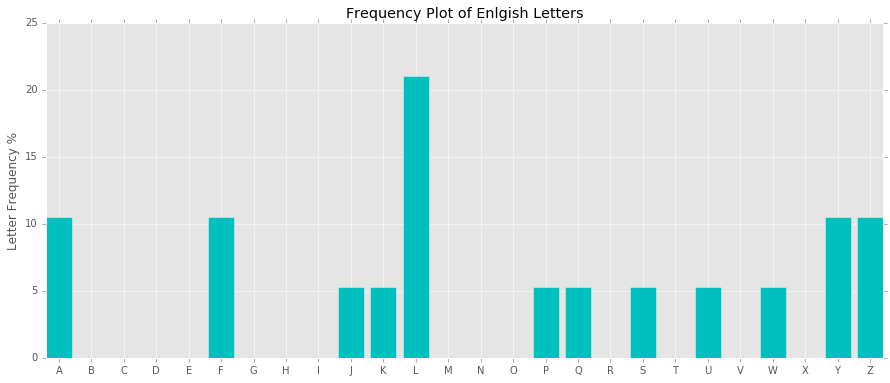

In [11]:
def plot_caesar_encrypted(text, shift):
    get_frequency_plot(encrypt_caesar(text, shift))
    
interact(plot_caesar_encrypted, text="Try changing this text", shift=(0,25))

See how the frequency plot slides as you move the slider for the shift? Can you think of how this type of frequency chart might be useful? Before we get into that lets have a look at another type of cipher. This one is calles the Vigenere Cipher. It's quite similar to the Caesar Cipher, but with a twist.

## The Vigenere Cipher

The Vigenere Cipher is also a substitution cipher, but this time it's a 'polyalphabetic' subsitution cipher. In fact, it's no more than multiple interwoven Caesar Ciphers. The way we achieve this is by having a keyword, and applying Caesar Ciphers on our text we want to encrypt based on the letters in this keyword.

### Example:

Assume we have the following text:<br>
"VIGENERE"

And we have the following keyword:<br>
"KEY"

First, we align the keyword with the text and keep repeating the keyword until we reach the end of the text we want to encrypt:
<table style="width:10%">
<tr>
<td>text</td>
<td>VIGENERE</td>
</tr>
<tr>
<td>key</td>
<td>KEYKEYKE</td>
</tr>
</table>

Then, each letter in the keyword defined the Caesar shift for the letter it aligns with in the text. The shift value is the index of the letter in our alphabet. So, A=0, B=1...K=11 ... and so on. Which gives us the following:
<table style="width:20%">
<tr>
<td>text</td>
<td>VIGENERE</td>
</tr>
<tr>
<td>key</td>
<td>KEYKEYKE</td>
</tr>
<tr>
<td>encrypted text</td>
<td>FMEORCBI</td>
</tr>
</table>

So, you may also notice that a Vigenere Cipher with a key that is a single character is in fact a single Caesar Cipher. If our key were 'A', then we end up with an encrypted text that is the same as the original text :)

Now lets look at how we can implement this chipher. Below you will find 2 functions. One of them (generate_key) generates a key so that whatever you decide your keyword to be, it's repeated until the end of the text you want to encrypt. The other function (encrypt_vigenere) is where we encrypt a text with the Vigenere Cipher.

In [12]:
def generate_key(text, key): 
    key = list(key) 
    if len(text) == len(key): 
        return(key) 
    elif len(key) > 0: 
        for i in range(get_normalized_length(text) - len(key)): 
            key.append(key[i % len(key)]) 
    return key

def encrypt_vigenere(text, key):
    text = normalize_text(text)
    key = normalize_text(key)
    key = generate_key(text, key)
    cipher_text = [] 
    key_index = 0;
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1 and len(key) > 0:
            x = (ord(text[i]) + ord(key[key_index])) % 26
            x += ord('A') 
            cipher_text.append(chr(x)) 
            key_index = key_index + 1
        else:
            cipher_text.append(text[i])
    cipher_text = ''.join(cipher_text)
    return cipher_text

#### Try changing the text and key below and generate your own encrypted message:

In [14]:
text = "Hello World"
key = "key"

print(encrypt_vigenere(text, key))

FMEORCBI


### Letter Frequencies

Now that you know what Caesar and Vigenere Ciphers are. Let's have a look at why looking at the frequency distribution of letters might be interesting. Let's start wit a simple example of a text that we know has been encrypted with a Vigenere Cipher with a key of length 1 and the resulting encrypted text is the following:

"QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

Now what if we were to want to decrypt this message? Let's start with looking at the frequency distribution of letters in this encrypted message first:

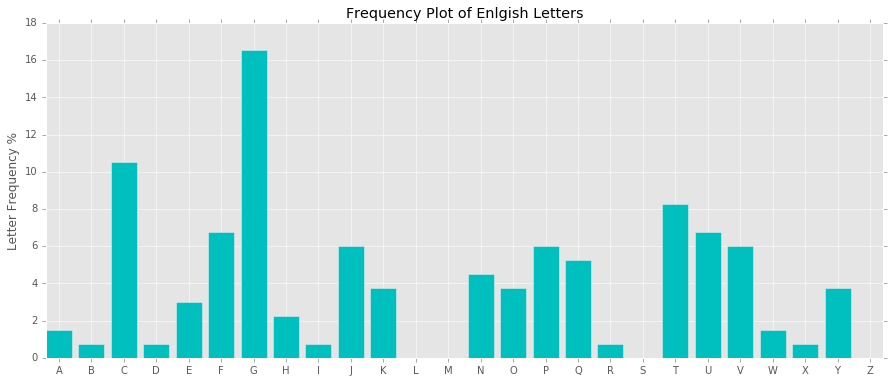

In [16]:
cipher_text = "QPEG VJGTG YCU C IKTN PCOGF GVJGN, YJQ YCU C FKUETGVG OCVJU YKB CV DTKUVQN. VJGP JGT RTQHGUUQT FGEKFGF JGT PCOG YCU CP QNF NCFA'U PCOG CPF OCFG HWP QH JGT GXGTA NGEVWTG"

get_frequency_plot(cipher_text)


In [214]:
english_letter_frequency = [
    ('A', 8.2), 
    ('B', 1.5), 
    ('C', 2.8), 
    ('D', 4.3), 
    ('E', 12.7), 
    ('F', 2.2), 
    ('G', 2.0), 
    ('H', 6.1), 
    ('I', 7.0),
    ('J', 0.15),
    ('K', 0.8), 
    ('L', 4.0), 
    ('M', 2.4), 
    ('N', 6.7), 
    ('O', 7.5), 
    ('P', 1.9), 
    ('Q', 0.1), 
    ('R', 6.0), 
    ('S', 6.3), 
    ('T', 9.1), 
    ('U', 2.8), 
    ('V', 1.0), 
    ('W', 2.4), 
    ('X', 0.15), 
    ('Y', 2.0), 
    ('Z', 0.07)]

keys = [item[0] for item in english_letter_frequency]
values = [item[1] for item in english_letter_frequency]

def decrytp_vigenre(cipher_text, key):
    result = ""
    # traverse text
    cipher_text = normalize_text(cipher_text)
    key = normalize_text(key)
    key = generate_key(cipher_text, key)
    key_index = 0
    for i in range(len(cipher_text)): 
        char = cipher_text[i] 
        if alphabet.count(char) < 1:
            result += char
        elif len(key) > 0:
            result += chr((ord(char) - ord(key[key_index]) + 26) % 26 + ord('A'))
            key_index = key_index + 1
    return result

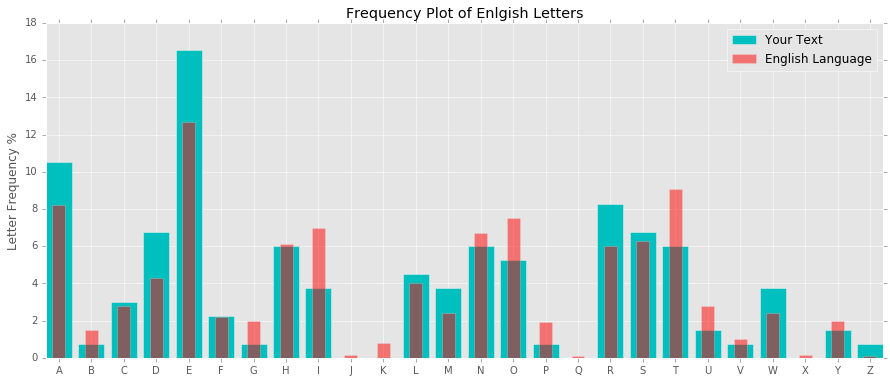

In [215]:
def plot_vigenre_decrypted(cipher_text, key):
    get_frequency_plot(decrytp_vigenre(cipher_text, key))
    plt.bar([i+0.2 for i in range(len(keys))], values, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted, cipher_text=fixed(cipher_text), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

In [154]:
key='C'
print(decrytp_vigenre(cipher_text, key))

ONCE THERE WAS A GIRL NAMED ETHEL, WHO WAS A DISCRETE MATHS WIZ AT BRISTOL. THEN HER PROFESSOR DECIDED HER NAME WAS AN OLD LADY'S NAME AND MADE FUN OF HER EVERY LECTURE


KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH.

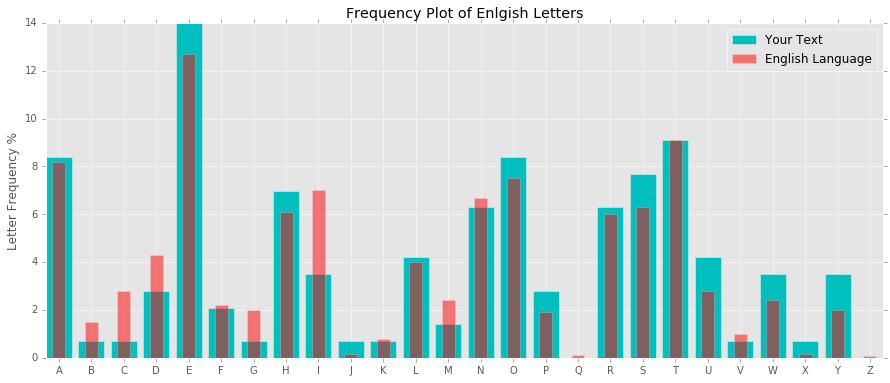

In [191]:
story = "KPJ MLGVHPOR, CHGCZX MXI, EBSU ET. RRIW CSMX OLYA RRER DLCI AGVP EBSU ET, YXH RRI UKC UORBI OLOA UKW RRMQ. YRC NEW GLCX WFO AYC XUY CCKVQ YPB CLC GEQ ZPYIMLQ ML K KYBHCX, ELN WFO TJEGIOH YXSRRIP PPMGIP KRB BEL GMRR MR DS FOV KYXFOV. G CYNZSQO WFO QSCX FKZC VSMUIB BERRIP NIJSKFDJSV, JMB QPC. HYBPGXK NEX FOV FKRB DS FOV FOEPD ELN GPSIB, “YL, URC AKR'R ISS BIKKML VMIO XFSW DYV CFIP!” DLGC AYC EJV XFKX NKWQOH ZOXUOIL DLCW SL DLC CYZTIAD, FSD LCXGCPSPDL UORBI OLOA RRER CLC WYQD KPYA SZ. CME EJGEWC OLYA YPXCB CME EPO XUY. XUY MQ DLC LIESRLSRE YJ RRI CXH."

def encrypted_with_key(text, key_index, key_length=3):
    result = ""
    index = 0
    for i in range(len(text)):
        if alphabet.count(text[i]) == 1:
            if index%key_length == key_index%key_length:
                result += text[i]
            index += 1
    return result

def plot_vigenre_decrypted_key_at_index(cipher_text, key_index, key):
    text_at_index = encrypted_with_key(story, key_index)
    get_frequency_plot(decrytp_vigenre(text_at_index, key))
    plt.bar([i+0.2 for i in range(len(keys))], values, width=0.4, alpha=0.5, color='r', label='English Language')
    plt.legend()
    
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(0), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])


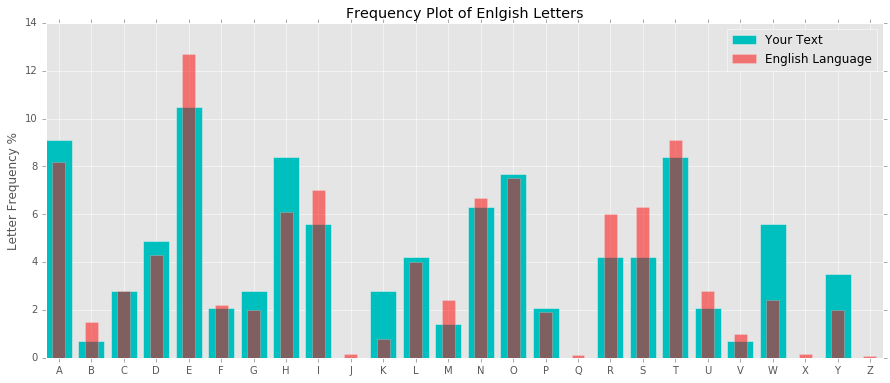

In [192]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(1), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

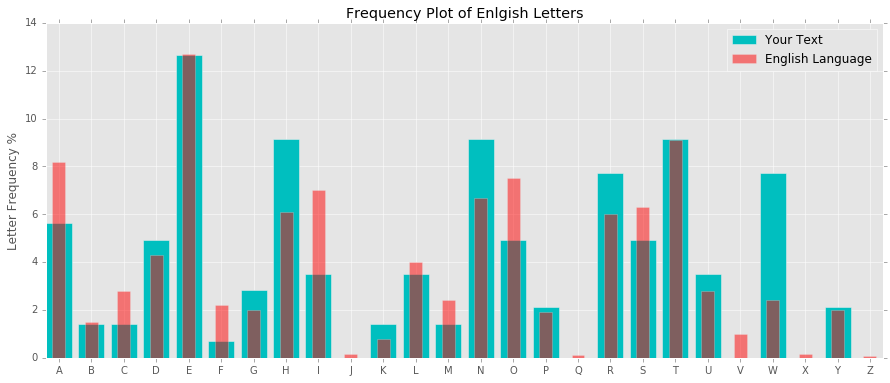

In [193]:
interact(plot_vigenre_decrypted_key_at_index, cipher_text=fixed(story), key_index=fixed(2), key=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
                                                         'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W',
                                                         'X', 'Y', 'Z'])

In [197]:
key="key"

print(decrytp_vigenre(story, key))

ALL CHILDREN, EXCEPT ONE, GROW UP. THEY SOON KNOW THAT THEY WILL GROW UP, AND THE WAY WENDY KNEW WAS THIS. ONE DAY WHEN SHE WAS TWO YEARS OLD SHE WAS PLAYING IN A GARDEN, AND SHE PLUCKED ANOTHER FLOWER AND RAN WITH IT TO HER MOTHER. I SUPPOSE SHE MUST HAVE LOOKED RATHER DELIGHTFUL, FOR MRS. DARLING PUT HER HAND TO HER HEART AND CRIED, “OH, WHY CAN'T YOU REMAIN LIKE THIS FOR EVER!” THIS WAS ALL THAT PASSED BETWEEN THEM ON THE SUBJECT, BUT HENCEFORTH WENDY KNEW THAT SHE MUST GROW UP. YOU ALWAYS KNOW AFTER YOU ARE TWO. TWO IS THE BEGINNING OF THE END.
